In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Create a model for specific property types. e.g for flats
flat_houseprices = pd.read_csv("datasets/houseprices_flats.csv")

In [4]:
print(len(flat_houseprices))

1712973


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

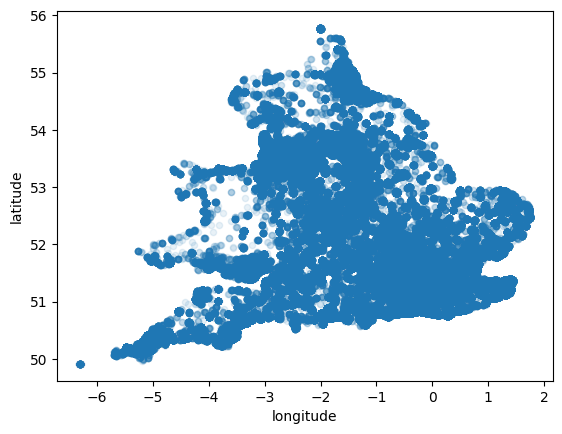

In [6]:
flat_houseprices.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<AxesSubplot: >

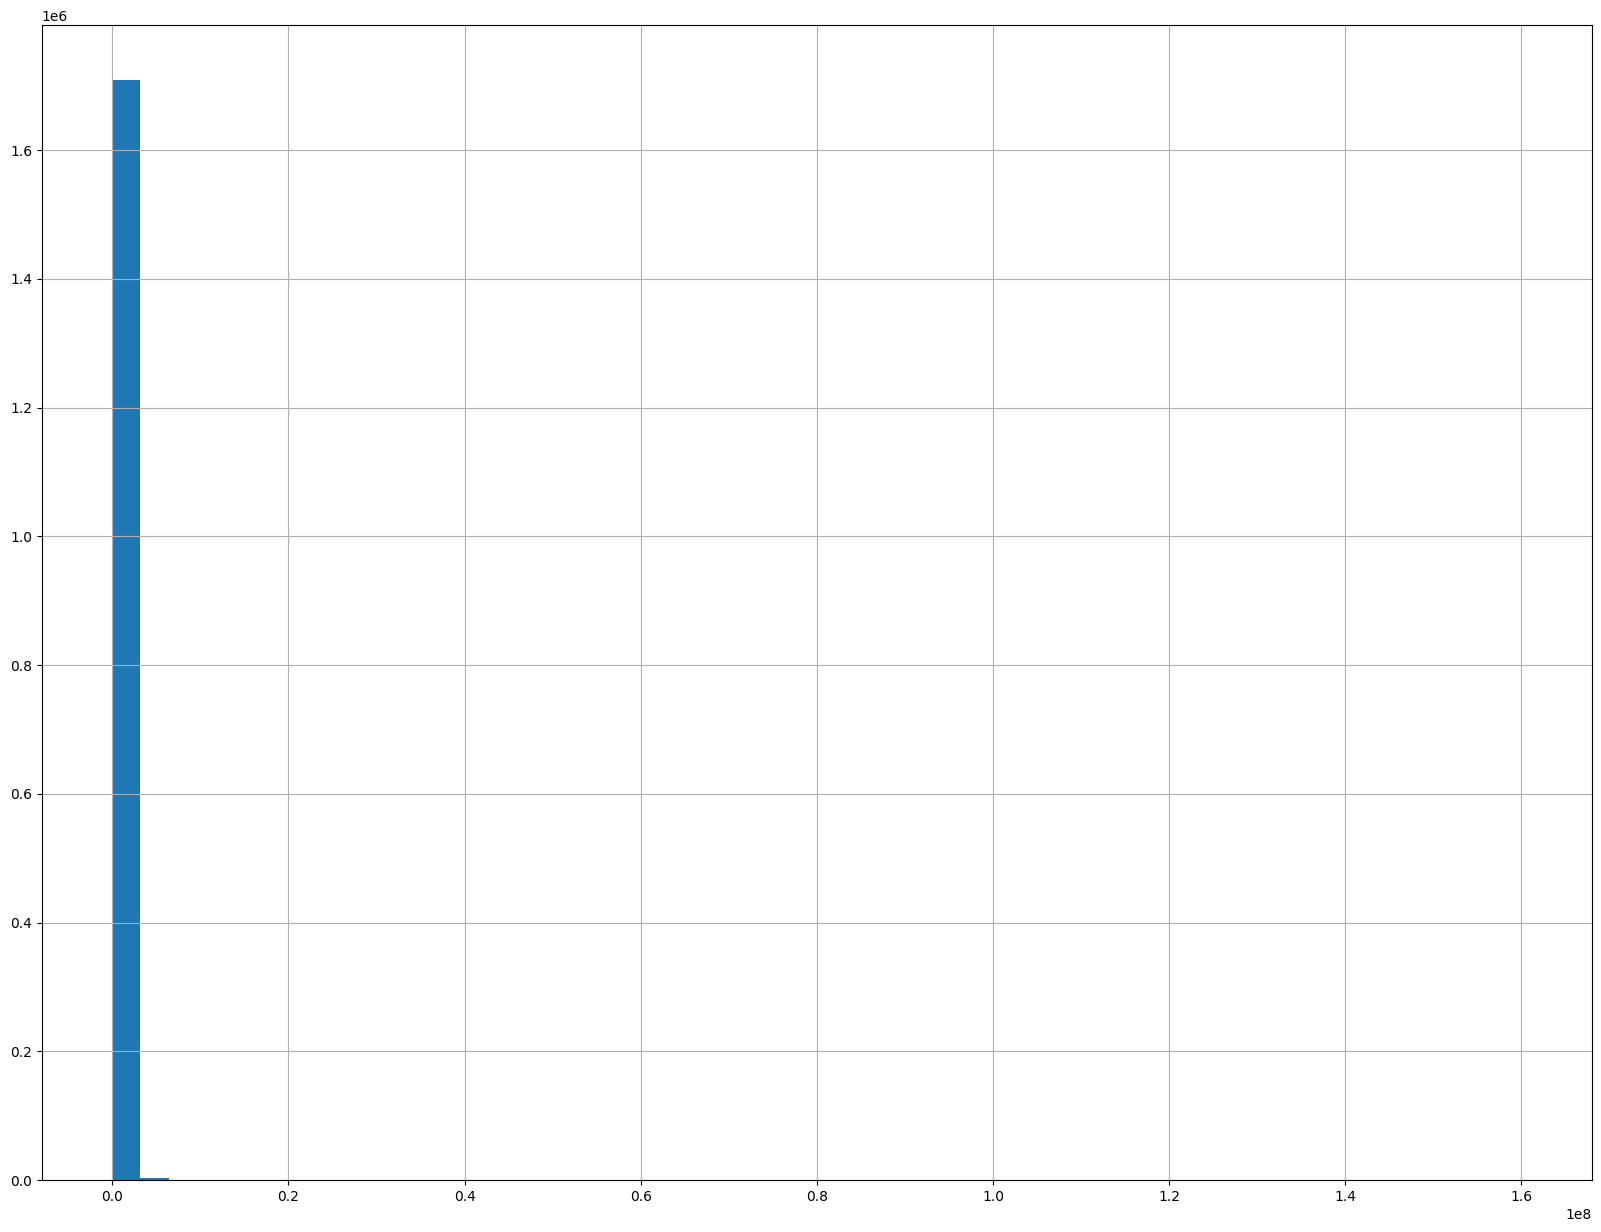

In [5]:
flat_houseprices['price'].hist(bins=50, figsize=(20,15))

In [7]:
print(flat_houseprices['price'].describe())

count    1.712973e+06
mean     2.898293e+05
std      4.924408e+05
min      1.000000e+00
25%      1.260000e+05
50%      2.000000e+05
75%      3.325000e+05
max      1.600000e+08
Name: price, dtype: float64


The deviation is too large, might be better to create model for a specific region based on the postcode

In [8]:
import re

In [9]:
flat_houseprices['postcode_prefix']= flat_houseprices['postcode'].apply(lambda x : re.split(r'(\d+)',str(x))[0])

In [10]:
print(flat_houseprices['postcode_prefix'].unique())
print(flat_houseprices['postcode_prefix'].nunique())

['OX' 'SW' 'SO' 'TW' 'CO' 'NN' 'SK' 'E' 'N' 'SE' 'CV' 'NG' 'NE' 'TR' 'BH'
 'HA' 'BN' 'W' 'CM' 'NW' 'SP' 'LA' 'SM' 'CW' 'KT' 'BS' 'GU' 'ST' 'EC' 'AL'
 'HP' 'TQ' 'CR' 'B' 'MK' 'CH' 'RG' 'DA' 'TA' 'HR' 'IP' 'EX' 'LE' 'GL' 'LS'
 'CT' 'L' 'YO' 'PR' 'PL' 'DE' 'TN' 'WD' 'BR' 'S' 'UB' 'PO' 'CB' 'NR' 'M'
 'SS' 'CF' 'LU' 'FY' 'PE' 'SY' 'BA' 'RM' 'DT' 'TS' 'DH' 'WA' 'HU' 'ME'
 'SG' 'SL' 'RH' 'EN' 'LN' 'SN' 'LL' 'WS' 'HG' 'OL' 'BL' 'IG' 'DN' 'HD'
 'WV' 'HX' 'SA' 'WR' 'WC' 'WF' 'DY' 'CA' 'TD' 'nan' 'BB' 'TF' 'BD' 'SR'
 'DL' 'NP' 'WN' 'LD']
106


https://ideal-postcodes.co.uk/guides/postcode-areas  
Idea into postcode format, the prefix, indicates the area.
e.g Greater London includes: WD, WC ,W, UB,SW,SM,SE,RM,NW,N,KT,
IG, HA,EN,EC,E,DA,CR,BR.

Wales: CF,LD,LL,NP,SA,SY,

Scotland: AB,DD,EH,FK,G,HS,IV,KA, KW, KY, ML, PH, TD, ZE

In [11]:
wales_list= ['CF','LD','LL','NP','SA','SY']
scotland_list=['AB','DD','EH','FK','G','HS','IV','KA', 'KW', 'KY', 'ML', 'PH', 'TD', 'ZE']
london_list=['WD', 'WC' ,'W', 'UB','SW','SM','SE','RM','NW','N','KT',
'IG', 'HA','EN','EC','E','DA','CR','BR']

## Wales

In [12]:
wales_flat_df= flat_houseprices.loc[flat_houseprices['postcode_prefix'].isin(wales_list)]

38715


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

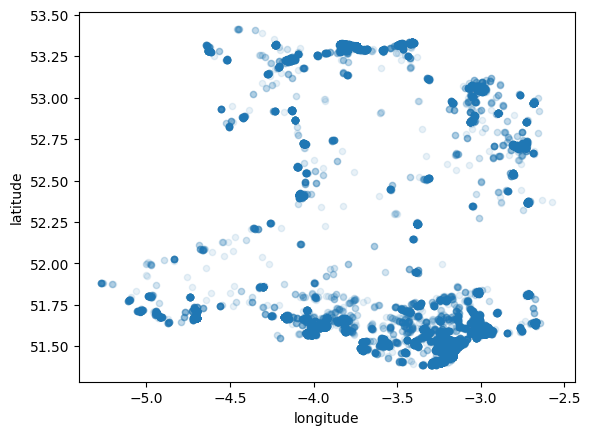

In [16]:
print(len(wales_flat_df))
wales_flat_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<AxesSubplot: >

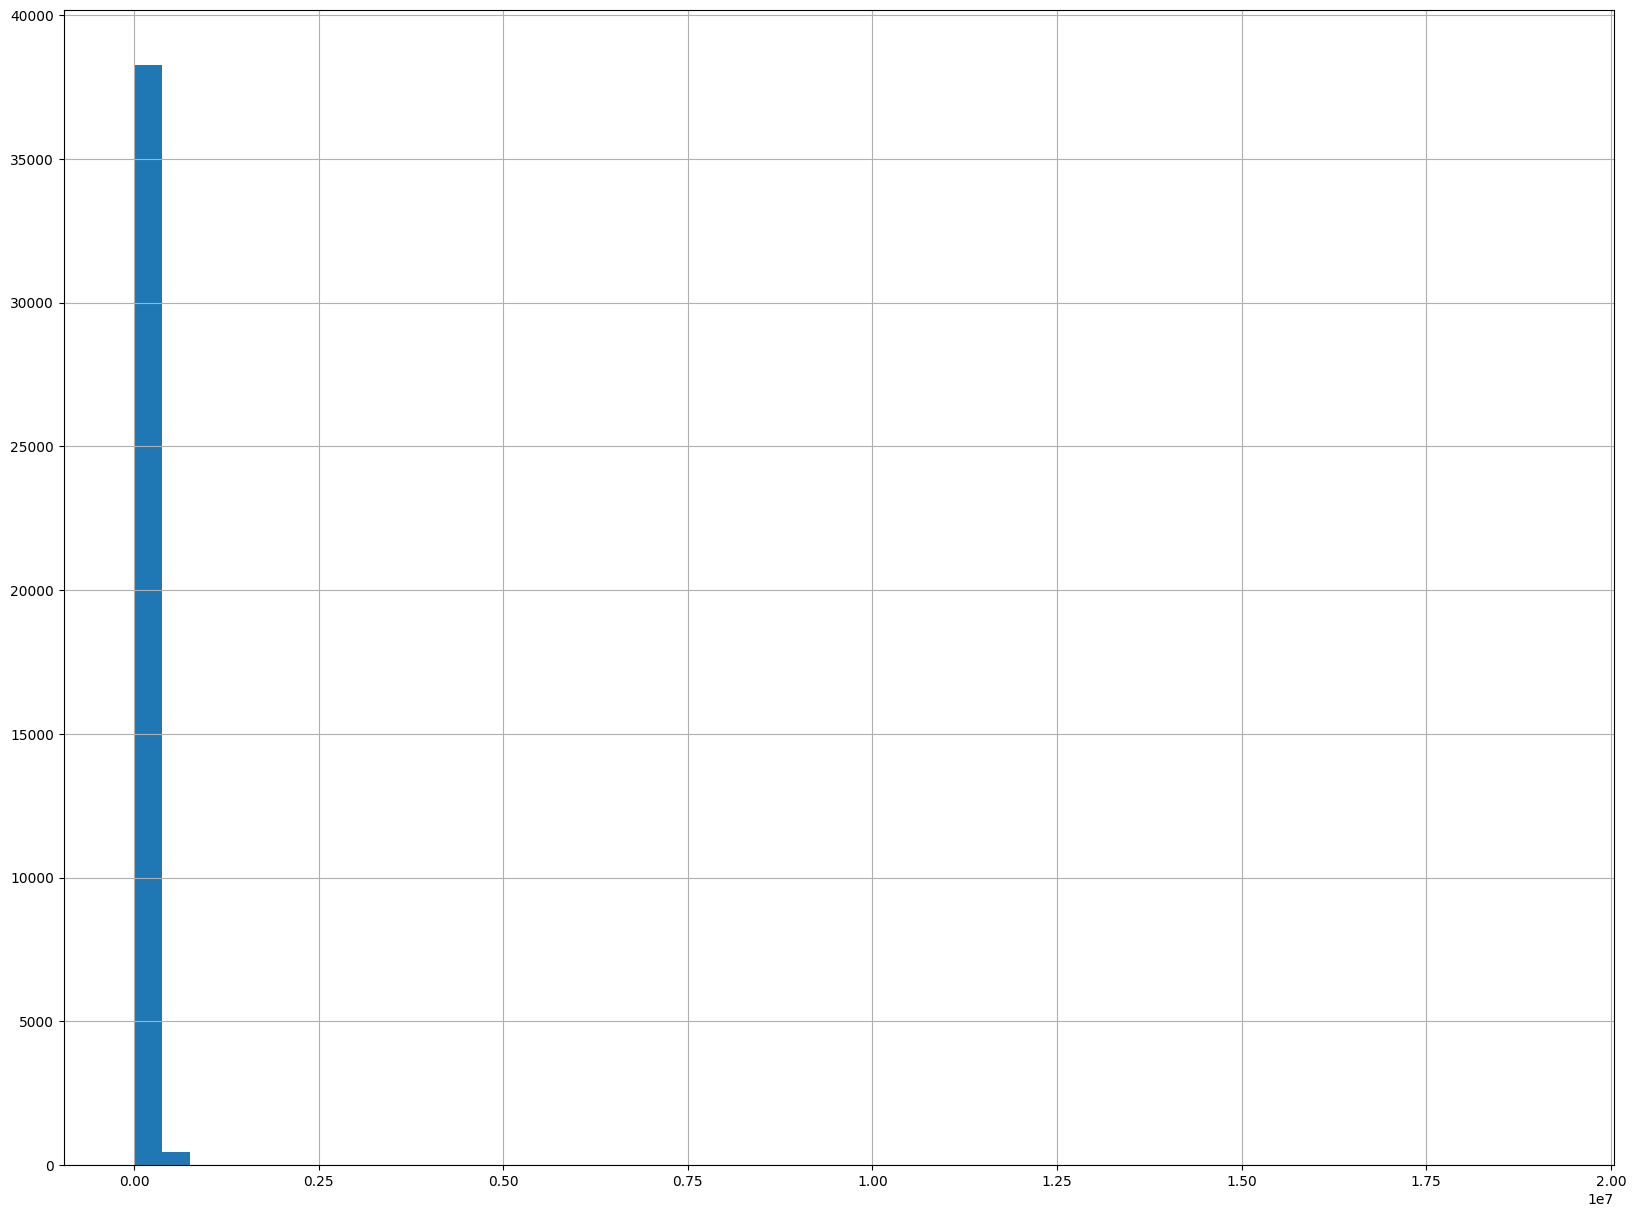

In [24]:
wales_flat_df['price'].hist(bins=50, figsize=(20,15))

## Scotland

In [17]:
scotland_flat_df= flat_houseprices.loc[flat_houseprices['postcode_prefix'].isin(scotland_list)]

323


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

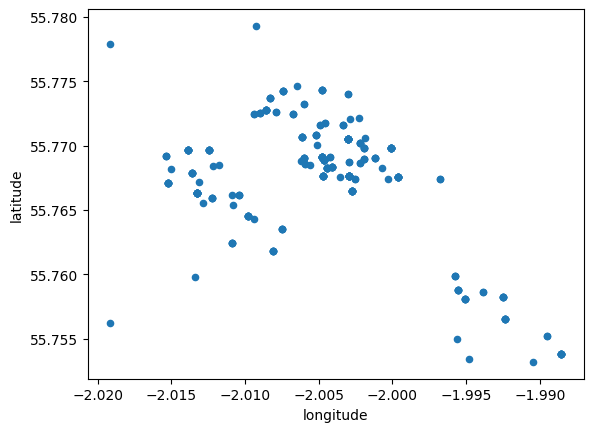

In [19]:
print(len(scotland_flat_df))
scotland_flat_df.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot: >

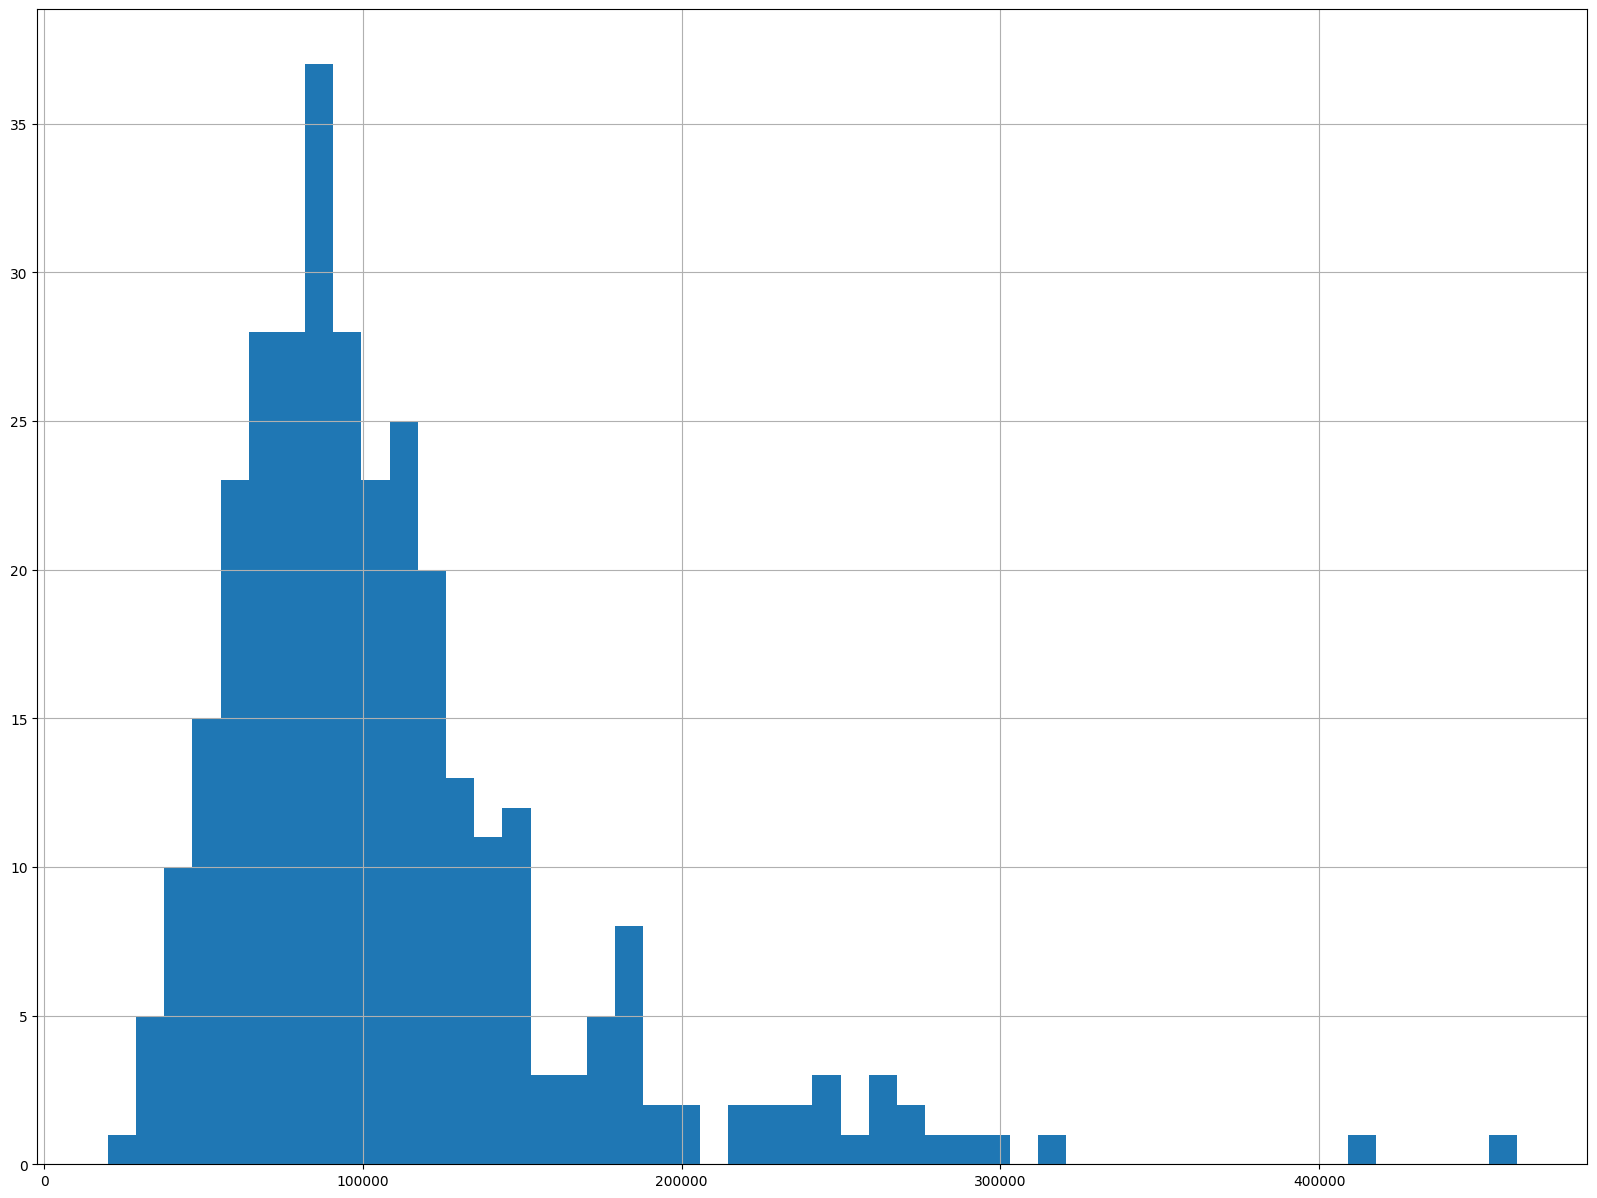

In [23]:
scotland_flat_df['price'].hist(bins=50, figsize=(20,15))

## London

In [20]:
london_flat_df= flat_houseprices.loc[flat_houseprices['postcode_prefix'].isin(london_list)]

609635


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

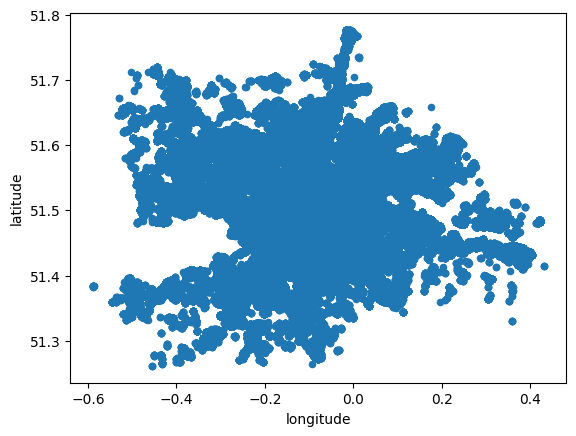

In [21]:
print(len(london_flat_df))
london_flat_df.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot: >

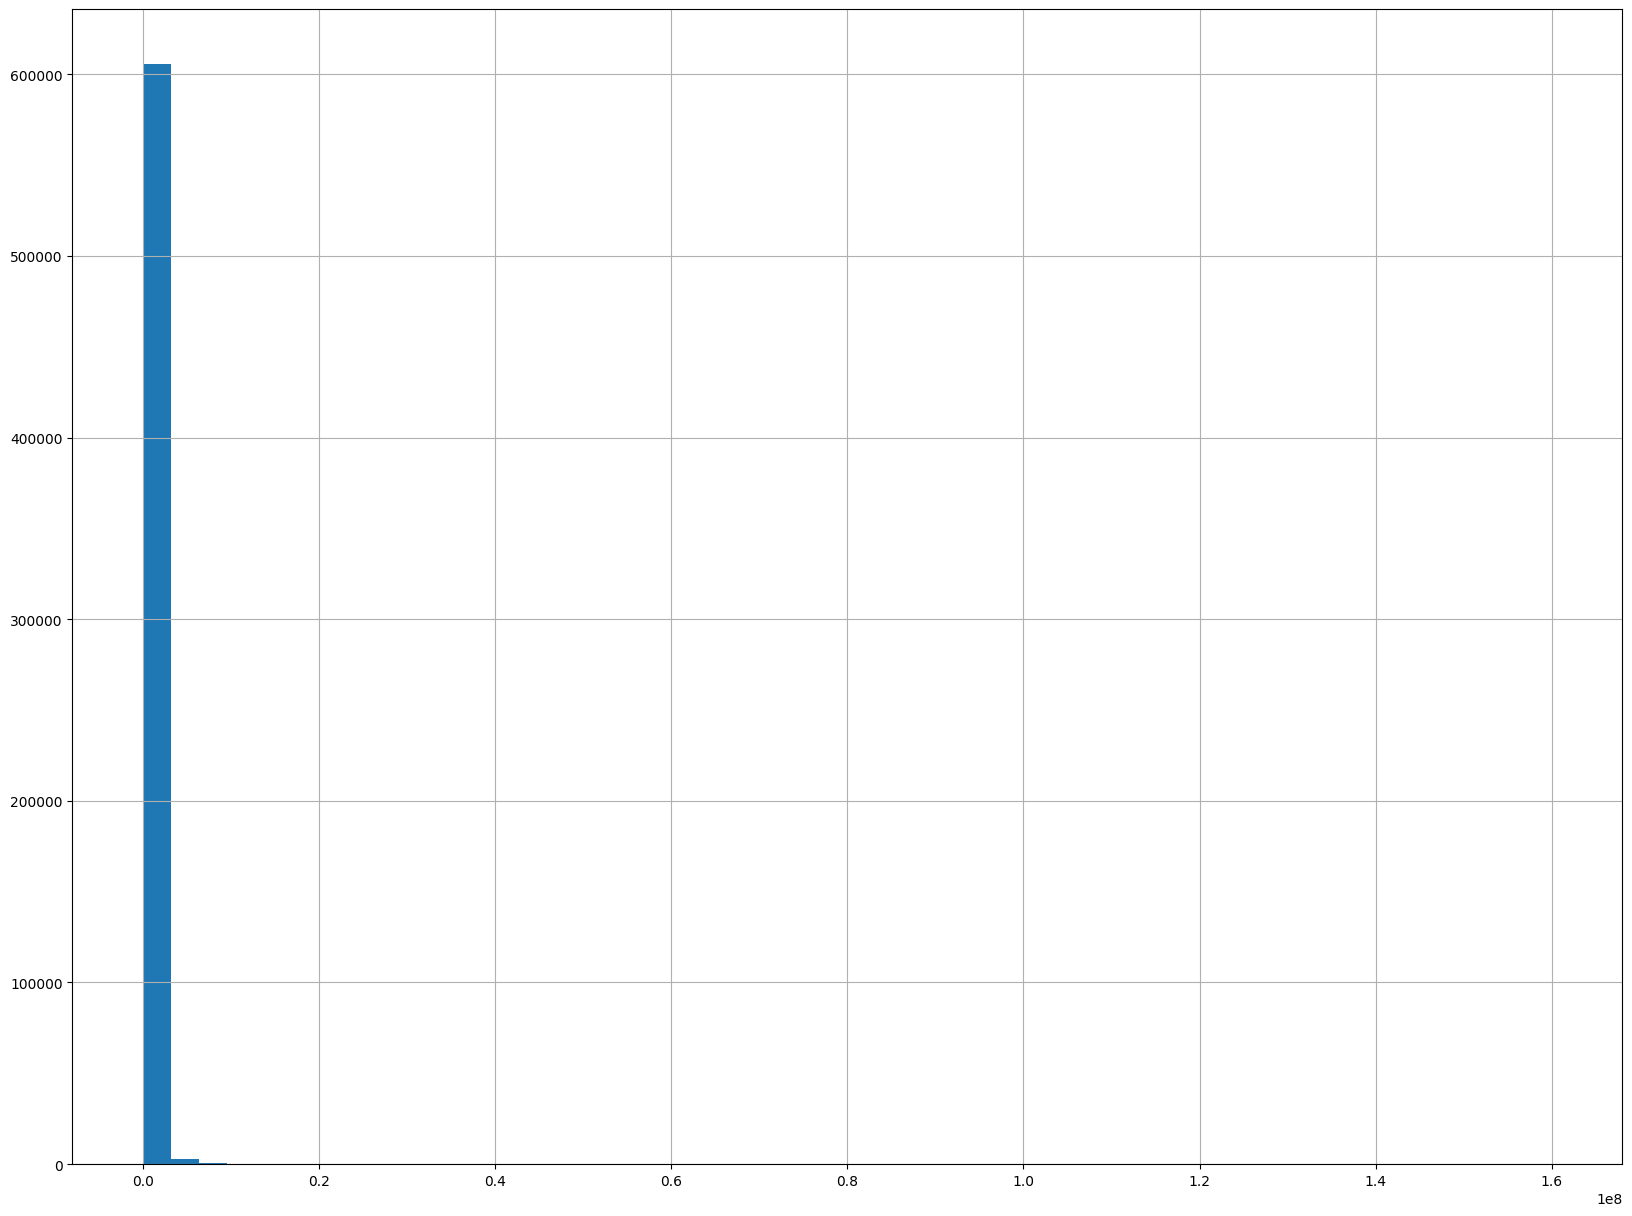

In [22]:
london_flat_df['price'].hist(bins=50, figsize=(20,15))